# 1. Import Dependencies and Data


In [ ]:
!pip install tensorflow matplotlib tensorflow-datasets ipywidgets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.0 MB/s eta 0:00:00


In [ ]:
!pip list

Package                               Version
------------------------------------- -------------------
absl-py                               1.4.0
absolufy-imports                      0.3.1
accelerate                            1.10.1
aiofiles                              24.1.0
aiohappyeyeballs                      2.6.1
aiohttp                               3.13.0
aiosignal                             1.4.0
alabaster                             1.0.0
albucore                              0.0.24
albumentations                        2.0.8
ale-py                                0.11.2
alembic                               1.16.5
altair                                5.5.0
annotated-types                       0.7.0
antlr4-python3-runtime                4.9.3
anyio                                 4.11.0
anywidget                             0.9.18
argon2-cffi                           25.1.0
argon2-cffi-bindings                  25.1.0
array_record                          0.8.1
arrow 

In [ ]:
# Bringing in tensorflow
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
# Brining in tensorflow datasets for fashion mnist
import tensorflow_datasets as tfds
# Bringing in matplotlib for viz stuff
from matplotlib import pyplot as plt

In [ ]:
# Use the tensorflow datasets api to bring in the data source
ds = tfds.load('fashion_mnist', split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.CXL1G2_3.0.1/fashion_mnist-train.tfrecord*...:   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.CXL1G2_3.0.1/fashion_mnist-test.tfrecord*...:   0…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
ds.as_numpy_iterator().next()['label']

np.int64(2)

2. Viz Data and Build Dataset

In [ ]:
# Do some data transformation
import numpy as np

In [ ]:
# Setup connection aka iterator
dataiterator = ds.as_numpy_iterator()

In [ ]:
# Getting data out of the pipeline
dataiterator.next()['image']

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 18],
        [ 77],
        [227],
        [227],
        [208],
        [210],
        [225],
        [216],
        [ 85],
        [ 32],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 61],
        [100],
        [ 97],
        [ 80],
        [ 57],
        [117],
        [227],
        [238],
        [115],
        [ 49],
        [ 78],
        [106],
        [108],
        [ 71],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 81],
        [105],
        [ 80],
        [ 69],
      

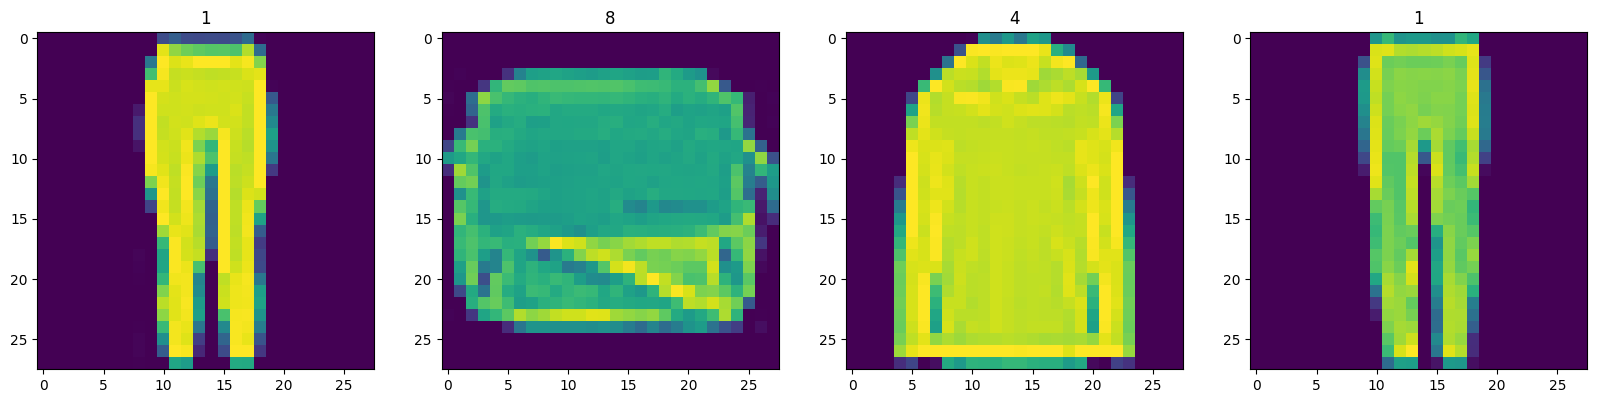

In [ ]:
# Setup the subplot formatting
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# Loop four times and get images
for idx in range(4):
    # Grab an image and label
    sample = dataiterator.next()
    # Plot the image using a specific subplot
    ax[idx].imshow(np.squeeze(sample['image']))
    # Appending the image label as the plot title
    ax[idx].title.set_text(sample['label'])

In [ ]:
# Scale and return images only
def scale_images(data):
    image = data['image']
    return image / 255

In [ ]:
# Reload the dataset
ds = tfds.load('fashion_mnist', split='train')
# Running the dataset through the scale_images preprocessing step
ds = ds.map(scale_images)
# Cache the dataset for that batch
ds = ds.cache()
# Shuffle it up
ds = ds.shuffle(60000)
# Batch into 128 images per sample
ds = ds.batch(128)
# Reduces the likelihood of bottlenecking
ds = ds.prefetch(64)

In [ ]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

3. Build Neural Network

3.1 Import Modelling Components

In [ ]:
# Bring in the sequential api for the generator and discriminator
from tensorflow.keras.models import Sequential
# Bring in the layers for the neural network
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

3.2 Build Generator

In [ ]:
def build_generator():
    model = Sequential()

    # Takes in random values and reshapes it to 7x7x128
    # Beginnings of a generated image
    model.add(Dense(7*7*128, input_dim=128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))

    # Upsampling block 1
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))

    # Upsampling block 2
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))

    # Convolutional block 1
    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))

    # Convolutional block 2
    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))

    # Conv layer to get to one channel
    model.add(Conv2D(1, 4, padding='same', activation='sigmoid'))

    return model

In [ ]:
generator = build_generator()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
generator.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 6272)           │       809,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 14, 14, 128)    │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 128)    │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 1)      │         2,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,155,137 (8.22 MB)

 Trainable params: 2,155,137 (8.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

img = generator.predict(np.random.randn(4,128,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


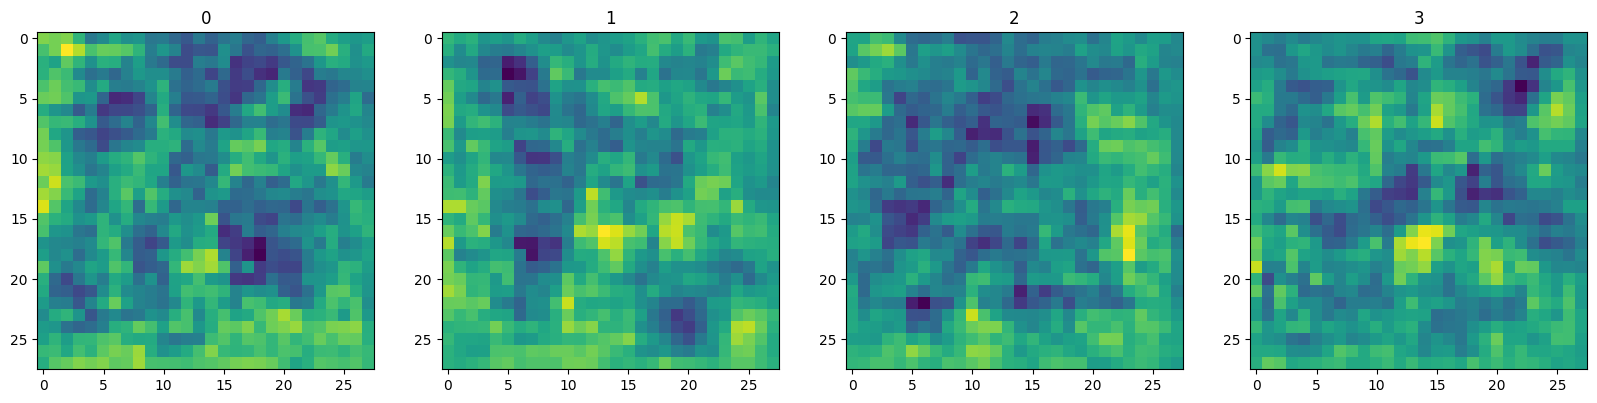

In [ ]:
# Generate new fashion
img = generator.predict(np.random.randn(4,128,1))
# Setup the subplot formatting
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# Loop four times and get images
for idx, img in enumerate(img):
    # Plot the image using a specific subplot
    ax[idx].imshow(np.squeeze(img))
    # Appending the image label as the plot title
    ax[idx].title.set_text(idx)

3.3 Build Discriminator

In [ ]:
def build_discriminator():
    model = Sequential()

    # First Conv Block
    model.add(Conv2D(32, 5, input_shape = (28,28,1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Second Conv Block
    model.add(Conv2D(64, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Third Conv Block
    model.add(Conv2D(128, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Fourth Conv Block
    model.add(Conv2D(256, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Flatten then pass to dense layer
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))

    return model

In [ ]:

discriminator = build_discriminator()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

discriminator.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 20, 20, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 256)    │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │        36,865 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,113,345 (4.25 MB)

 Trainable params: 1,113,345 (4.25 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
img = img[0]

In [ ]:
img.shape

(4, 28, 28, 1)

In [ ]:
discriminator.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 831ms/step


array([[0.49756798],
       [0.49731946],
       [0.49720687],
       [0.49717304]], dtype=float32)

4. Construct Training Loop

4.1 Setup Losses and Optimizers

In [ ]:
# Adam is going to be the optimizer for both
from tensorflow.keras.optimizers import Adam
# Binary cross entropy is going to be the loss for both
from tensorflow.keras.losses import BinaryCrossentropy

In [ ]:
g_opt = Adam(learning_rate=0.0001)
d_opt = Adam(learning_rate=0.00001)
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

4.2 Build Subclassed Model

In [ ]:
# Importing the base model class to subclass our training step
from tensorflow.keras.models import Model

In [ ]:
class FashionGAN(Model):
    def __init__(self, generator, discriminator, *args, **kwargs):
        # Pass through args and kwargs to base class
        super().__init__(*args, **kwargs)

        # Create attributes for gen and disc
        self.generator = generator
        self.discriminator = discriminator

    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
        # Compile with base class
        super().compile(*args, **kwargs)

        # Create attributes for losses and optimizers
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss

    def train_step(self, batch):
        # Get the data
        real_images = batch
        fake_images = self.generator(tf.random.normal((128, 128, 1)), training=False)

        # Train the discriminator
        with tf.GradientTape() as d_tape:
            # Pass the real and fake images to the discriminator model
            yhat_real = self.discriminator(real_images, training=True)
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)

            # Create labels for real and fakes images
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)

            # Add some noise to the TRUE outputs
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)

            # Calculate loss - BINARYCROSS
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)

        # Apply backpropagation - nn learn
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))

        # Train the generator
        with tf.GradientTape() as g_tape:
            # Generate some new images
            gen_images = self.generator(tf.random.normal((128,128,1)), training=True)

            # Create the predicted labels
            predicted_labels = self.discriminator(gen_images, training=False)

            # Calculate loss - trick to training to fake out the discriminator
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels)

        # Apply backprop
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))

        return {"d_loss":total_d_loss, "g_loss":total_g_loss}

In [ ]:
fashgan = FashionGAN(generator, discriminator)

In [ ]:
# Compile the model
fashgan.compile(g_opt, d_opt, g_loss, d_loss)

4.3 Build Callback

In [ ]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [ ]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('images', f'generated_img_{epoch}_{i}.png'))

4.3 Train

In [ ]:
hist = fashgan.fit(ds, epochs=60, callbacks=[ModelMonitor()])

Epoch 1/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 78s 166ms/step - d_loss: 0.4299 - g_loss: 1.3501
Epoch 2/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 62s 133ms/step - d_loss: 0.3291 - g_loss: 3.2161
Epoch 3/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 62s 132ms/step - d_loss: 0.5308 - g_loss: 3.3118
Epoch 4/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 62s 133ms/step - d_loss: 0.6278 - g_loss: 0.5321
Epoch 5/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 62s 133ms/step - d_loss: 0.6559 - g_loss: 0.2844
Epoch 6/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 62s 133ms/step - d_loss: 0.7033 - g_loss: 0.5892
Epoch 7/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 62s 133ms/step - d_loss: 0.6465 - g_loss: 0.5969
Epoch 8/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 63s 133ms/step - d_loss: 0.6896 - g_loss: 0.4258
Epoch 9/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 63s 133ms/step - d_loss: 0.6578 - g_loss: 0.5854
Epoch 10/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 62s 133ms/step - d_loss: 0.6992 - g_loss: 0.5694
Epoch 11/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 62s 133ms/step - d_loss: 0.6828 - g_loss: 0.6215
Epoch 12/60
469/469

In [ ]:
# continue training in short bursts so you can monitor progress
hist_more = fashgan.fit(ds, epochs=20, callbacks=[ModelMonitor()])  # try 20, then sample


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 66s 141ms/step - d_loss: 1.3902 - g_loss: 0.6922
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 115ms/step - d_loss: 1.3851 - g_loss: 0.7002
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 114ms/step - d_loss: 1.3828 - g_loss: 0.7119
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 115ms/step - d_loss: 1.0103 - g_loss: 1.1375
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 114ms/step - d_loss: 0.3910 - g_loss: 4.5228
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 114ms/step - d_loss: 0.3567 - g_loss: 6.0301
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 115ms/step - d_loss: 0.3460 - g_loss: 6.8423
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 115ms/step - d_loss: 0.3402 - g_loss: 7.4691
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 115ms/step - d_loss: 0.3356 - g_loss: 7.9825
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 115ms/step - d_loss: 0.3322 - g_loss: 8.4752
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 115ms/step - d_loss: 0.3300 - g_loss: 8.9874
Epoch 12/20
469/469

In [ ]:
hist_more = fashgan.fit(ds, epochs=30, callbacks=[ModelMonitor()])  # try 20, then sample


Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 64s 136ms/step - d_loss: 1.4140 - g_loss: 0.6846
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 115ms/step - d_loss: 1.1727 - g_loss: 2.0007
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 114ms/step - d_loss: 1.3810 - g_loss: 0.6877
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 115ms/step - d_loss: 1.3679 - g_loss: 0.7040
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 115ms/step - d_loss: 1.3777 - g_loss: 0.6976
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 115ms/step - d_loss: 1.3798 - g_loss: 0.6962
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 115ms/step - d_loss: 1.3763 - g_loss: 0.7101
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 115ms/step - d_loss: 1.3830 - g_loss: 0.7077
Epoch 9/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 115ms/step - d_loss: 1.3805 - g_loss: 0.7164
Epoch 10/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 115ms/step - d_loss: 1.3794 - g_loss: 0.7244
Epoch 11/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 115ms/step - d_loss: 1.3773 - g_loss: 0.7263
Epoch 12/30
469/469

In [ ]:
hist_more = fashgan.fit(ds, epochs=30, callbacks=[ModelMonitor()])  # try 20, then sample


Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 53s 113ms/step - d_loss: 1.3771 - g_loss: 0.7168
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 115ms/step - d_loss: 1.3771 - g_loss: 0.7169
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 115ms/step - d_loss: 1.3770 - g_loss: 0.7194
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 115ms/step - d_loss: 1.3772 - g_loss: 0.7209
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 115ms/step - d_loss: 1.3771 - g_loss: 0.7221
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 115ms/step - d_loss: 1.3770 - g_loss: 0.7228
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 115ms/step - d_loss: 1.3768 - g_loss: 0.7235
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 115ms/step - d_loss: 1.3769 - g_loss: 0.7240
Epoch 9/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 115ms/step - d_loss: 1.3766 - g_loss: 0.7249
Epoch 10/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 115ms/step - d_loss: 1.3768 - g_loss: 0.7243
Epoch 11/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 115ms/step - d_loss: 1.3767 - g_loss: 0.7246
Epoch 12/30
469/469

In [ ]:
hist_more = fashgan.fit(ds, epochs=30, callbacks=[ModelMonitor()])

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 116ms/step - d_loss: 1.3764 - g_loss: 0.7308
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 114ms/step - d_loss: 1.3766 - g_loss: 0.7339
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 115ms/step - d_loss: 1.3762 - g_loss: 0.7321
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 115ms/step - d_loss: 1.3763 - g_loss: 0.7275
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 115ms/step - d_loss: 1.3763 - g_loss: 0.7304
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 115ms/step - d_loss: 1.3761 - g_loss: 0.7309
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 115ms/step - d_loss: 1.3763 - g_loss: 0.7334
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 115ms/step - d_loss: 1.3765 - g_loss: 0.7375
Epoch 9/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 115ms/step - d_loss: 1.3763 - g_loss: 0.7380
Epoch 10/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 115ms/step - d_loss: 1.3763 - g_loss: 0.7336
Epoch 11/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 115ms/step - d_loss: 1.3764 - g_loss: 0.7347
Epoch 12/30
469/469

4.4 Review Performance

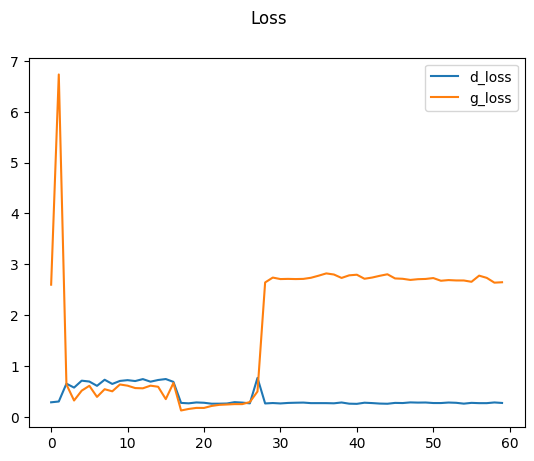

In [ ]:
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'], label='d_loss')
plt.plot(hist.history['g_loss'], label='g_loss')
plt.legend()
plt.show()

5. Test Out the Generator

5.1 Generate Images

In [ ]:
z = tf.random.normal((16, 128))

In [ ]:
activation='tanh'

In [ ]:
imgs = (imgs + 1.0) / 2.0

In [ ]:
activation='sigmoid'

shape: (16, 28, 28, 1)
min/max/mean/std: 0.0 0.99971825 0.2862383 0.32726404


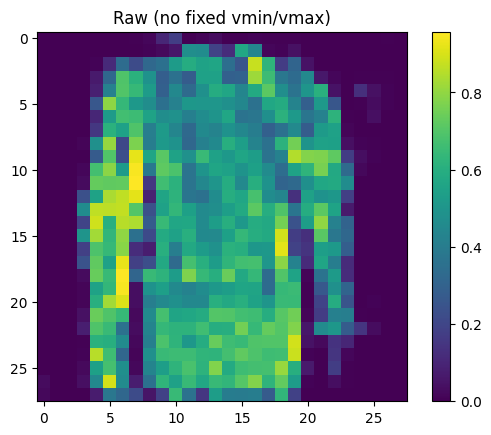

In [ ]:
import tensorflow as tf, numpy as np, matplotlib.pyplot as plt

# fresh sample (correct shape!)
z = tf.random.normal((16, 128))
imgs = generator(z, training=False).numpy()

print("shape:", imgs.shape)
print("min/max/mean/std:", imgs.min(), imgs.max(), imgs.mean(), imgs.std())

# show one image without forcing vmin/vmax
plt.imshow(imgs[0,:,:,0], cmap='viridis')
plt.colorbar(); plt.title("Raw (no fixed vmin/vmax)"); plt.show()


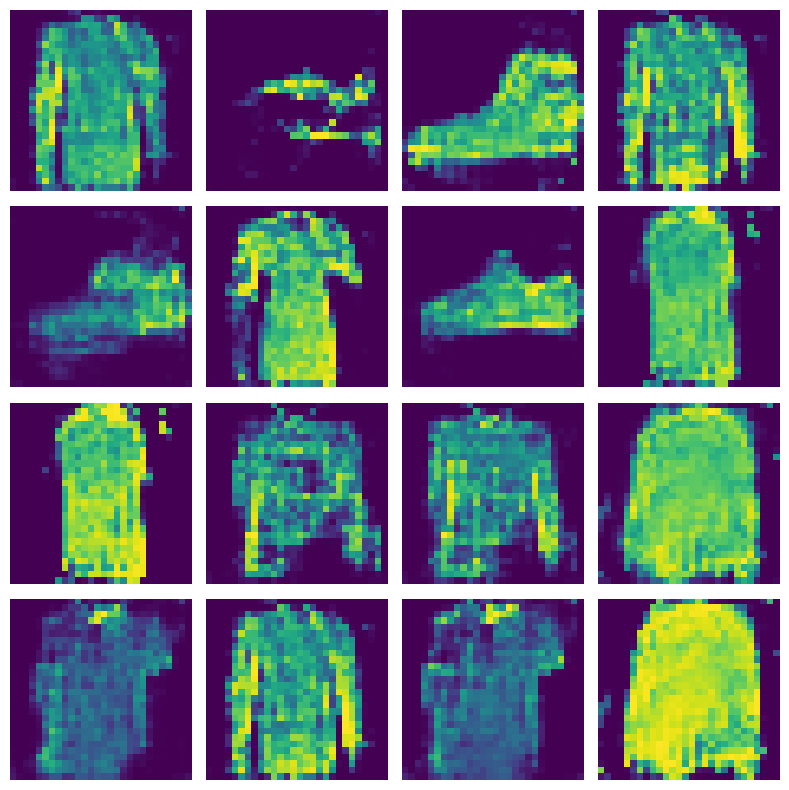

In [ ]:
fig, ax = plt.subplots(4,4, figsize=(8,8))
for i in range(16):
    ax[i//4, i%4].imshow(imgs[i,:,:,0], cmap='viridis')  # no vmin/vmax first
    ax[i//4, i%4].axis('off')
plt.tight_layout(); plt.show()
